In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
melb = pd.read_csv('melbourne_housing_FULL.csv')
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Split data to X and y

In [162]:
X = melb.copy()
X = X.drop(columns=['Method'])

In [163]:
X.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [164]:
X = (
    X
    .assign(Car = lambda x: x['Car'].fillna(x['Car'].mean()).round(2))
)

In [165]:
X.head()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [166]:
X = X.drop(columns = ['BuildingArea'])
X.head()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [167]:
X = X.drop(columns = 'CouncilArea')
X.head()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0


In [168]:
X = (
    X
    .assign(YearBuiltWasMissing = lambda x: x['YearBuilt'].isna(),
           YearBuilt = lambda x: x['YearBuilt'].fillna(x['YearBuilt'].mean().round(2))
           )
)
X.head()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,YearBuiltWasMissing
0,Abbotsford,68 Studley St,2,h,NaN,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,1965.29,-37.8014,144.9958,Northern Metropolitan,4019.0,True
1,Abbotsford,85 Turner St,2,h,1480000.0,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,1965.29,-37.7996,144.9984,Northern Metropolitan,4019.0,True
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,1900.00,-37.8079,144.9934,Northern Metropolitan,4019.0,False
3,Abbotsford,18/659 Victoria St,3,u,NaN,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,1965.29,-37.8114,145.0116,Northern Metropolitan,4019.0,True
4,Abbotsford,5 Charles St,3,h,1465000.0,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,1900.00,-37.8093,144.9944,Northern Metropolitan,4019.0,False


### Смотрим на типы переменных

In [169]:
X.apply(lambda x: x.dtype)

Suburb                  object
Address                 object
Rooms                    int64
Type                    object
Price                  float64
SellerG                 object
Date                    object
Distance               float64
Postcode               float64
Bedroom2               float64
Bathroom               float64
Car                    float64
Landsize               float64
YearBuilt              float64
Lattitude              float64
Longtitude             float64
Regionname              object
Propertycount          float64
YearBuiltWasMissing       bool
dtype: object

In [170]:
categorical_cols = [
    'Suburb',
    'Type',
    'Regionname',
    'YearBuiltWasMissing'
]

numerical_cols = [
    'Rooms',
    'Distance',
    'Bedroom2',
    'Bathroom',
    'Car',
    'Landsize',
    'YearBuilt',
    'Lattitude',
    'Longtitude',
    'Propertycount'
]


cols_to_drop = [
    'Address',
    'SellerG',
    'Date',
    'Postcode'
]

In [171]:
X = (
    X 
    .assign(Suburb = lambda x: x['Suburb'].map(lambda y: y if x['Suburb'].value_counts()[y] > 400 else 'RareSuburb'))
)

In [172]:
X = X.drop(columns = cols_to_drop)
X.head()

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,YearBuiltWasMissing
0,RareSuburb,2,h,NaN,2.5,2.0,1.0,1.0,126.0,1965.29,-37.8014,144.9958,Northern Metropolitan,4019.0,True
1,RareSuburb,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,1965.29,-37.7996,144.9984,Northern Metropolitan,4019.0,True
2,RareSuburb,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,1900.00,-37.8079,144.9934,Northern Metropolitan,4019.0,False
3,RareSuburb,3,u,NaN,2.5,3.0,2.0,1.0,0.0,1965.29,-37.8114,145.0116,Northern Metropolitan,4019.0,True
4,RareSuburb,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,1900.00,-37.8093,144.9944,Northern Metropolitan,4019.0,False


In [173]:
X = pd.get_dummies(X, columns = categorical_cols)
X.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,...,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,YearBuiltWasMissing_False,YearBuiltWasMissing_True
0,2,NaN,2.5,2.0,1.0,1.0,126.0,1965.29,-37.8014,144.9958,...,False,False,True,False,False,False,False,False,False,True
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,1965.29,-37.7996,144.9984,...,False,False,True,False,False,False,False,False,False,True
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,1900.00,-37.8079,144.9934,...,False,False,True,False,False,False,False,False,True,False
3,3,NaN,2.5,3.0,2.0,1.0,0.0,1965.29,-37.8114,145.0116,...,False,False,True,False,False,False,False,False,False,True
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,1900.00,-37.8093,144.9944,...,False,False,True,False,False,False,False,False,True,False


In [174]:
X = X.dropna(axis = 0)
X.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,...,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,YearBuiltWasMissing_False,YearBuiltWasMissing_True
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,1965.29,-37.7996,144.9984,...,False,False,True,False,False,False,False,False,False,True
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,1900.00,-37.8079,144.9934,...,False,False,True,False,False,False,False,False,True,False
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,1900.00,-37.8093,144.9944,...,False,False,True,False,False,False,False,False,True,False
5,3,850000.0,2.5,3.0,2.0,1.0,94.0,1965.29,-37.7969,144.9969,...,False,False,True,False,False,False,False,False,False,True
6,4,1600000.0,2.5,3.0,1.0,2.0,120.0,2014.00,-37.8072,144.9941,...,False,False,True,False,False,False,False,False,True,False


In [175]:
X.isna().sum()

Rooms                                    0
Price                                    0
Distance                                 0
Bedroom2                                 0
Bathroom                                 0
Car                                      0
Landsize                                 0
YearBuilt                                0
Lattitude                                0
Longtitude                               0
Propertycount                            0
Suburb_Balwyn North                      0
Suburb_Bentleigh East                    0
Suburb_Brighton                          0
Suburb_Brunswick                         0
Suburb_Camberwell                        0
Suburb_Coburg                            0
Suburb_Essendon                          0
Suburb_Glen Iris                         0
Suburb_Hawthorn                          0
Suburb_Kew                               0
Suburb_Northcote                         0
Suburb_Preston                           0
Suburb_Rare

In [176]:
X.count()

Rooms                                    17951
Price                                    17951
Distance                                 17951
Bedroom2                                 17951
Bathroom                                 17951
Car                                      17951
Landsize                                 17951
YearBuilt                                17951
Lattitude                                17951
Longtitude                               17951
Propertycount                            17951
Suburb_Balwyn North                      17951
Suburb_Bentleigh East                    17951
Suburb_Brighton                          17951
Suburb_Brunswick                         17951
Suburb_Camberwell                        17951
Suburb_Coburg                            17951
Suburb_Essendon                          17951
Suburb_Glen Iris                         17951
Suburb_Hawthorn                          17951
Suburb_Kew                               17951
Suburb_Northc

In [177]:
y = X['Price']
X = X.drop(columns = ['Price'])

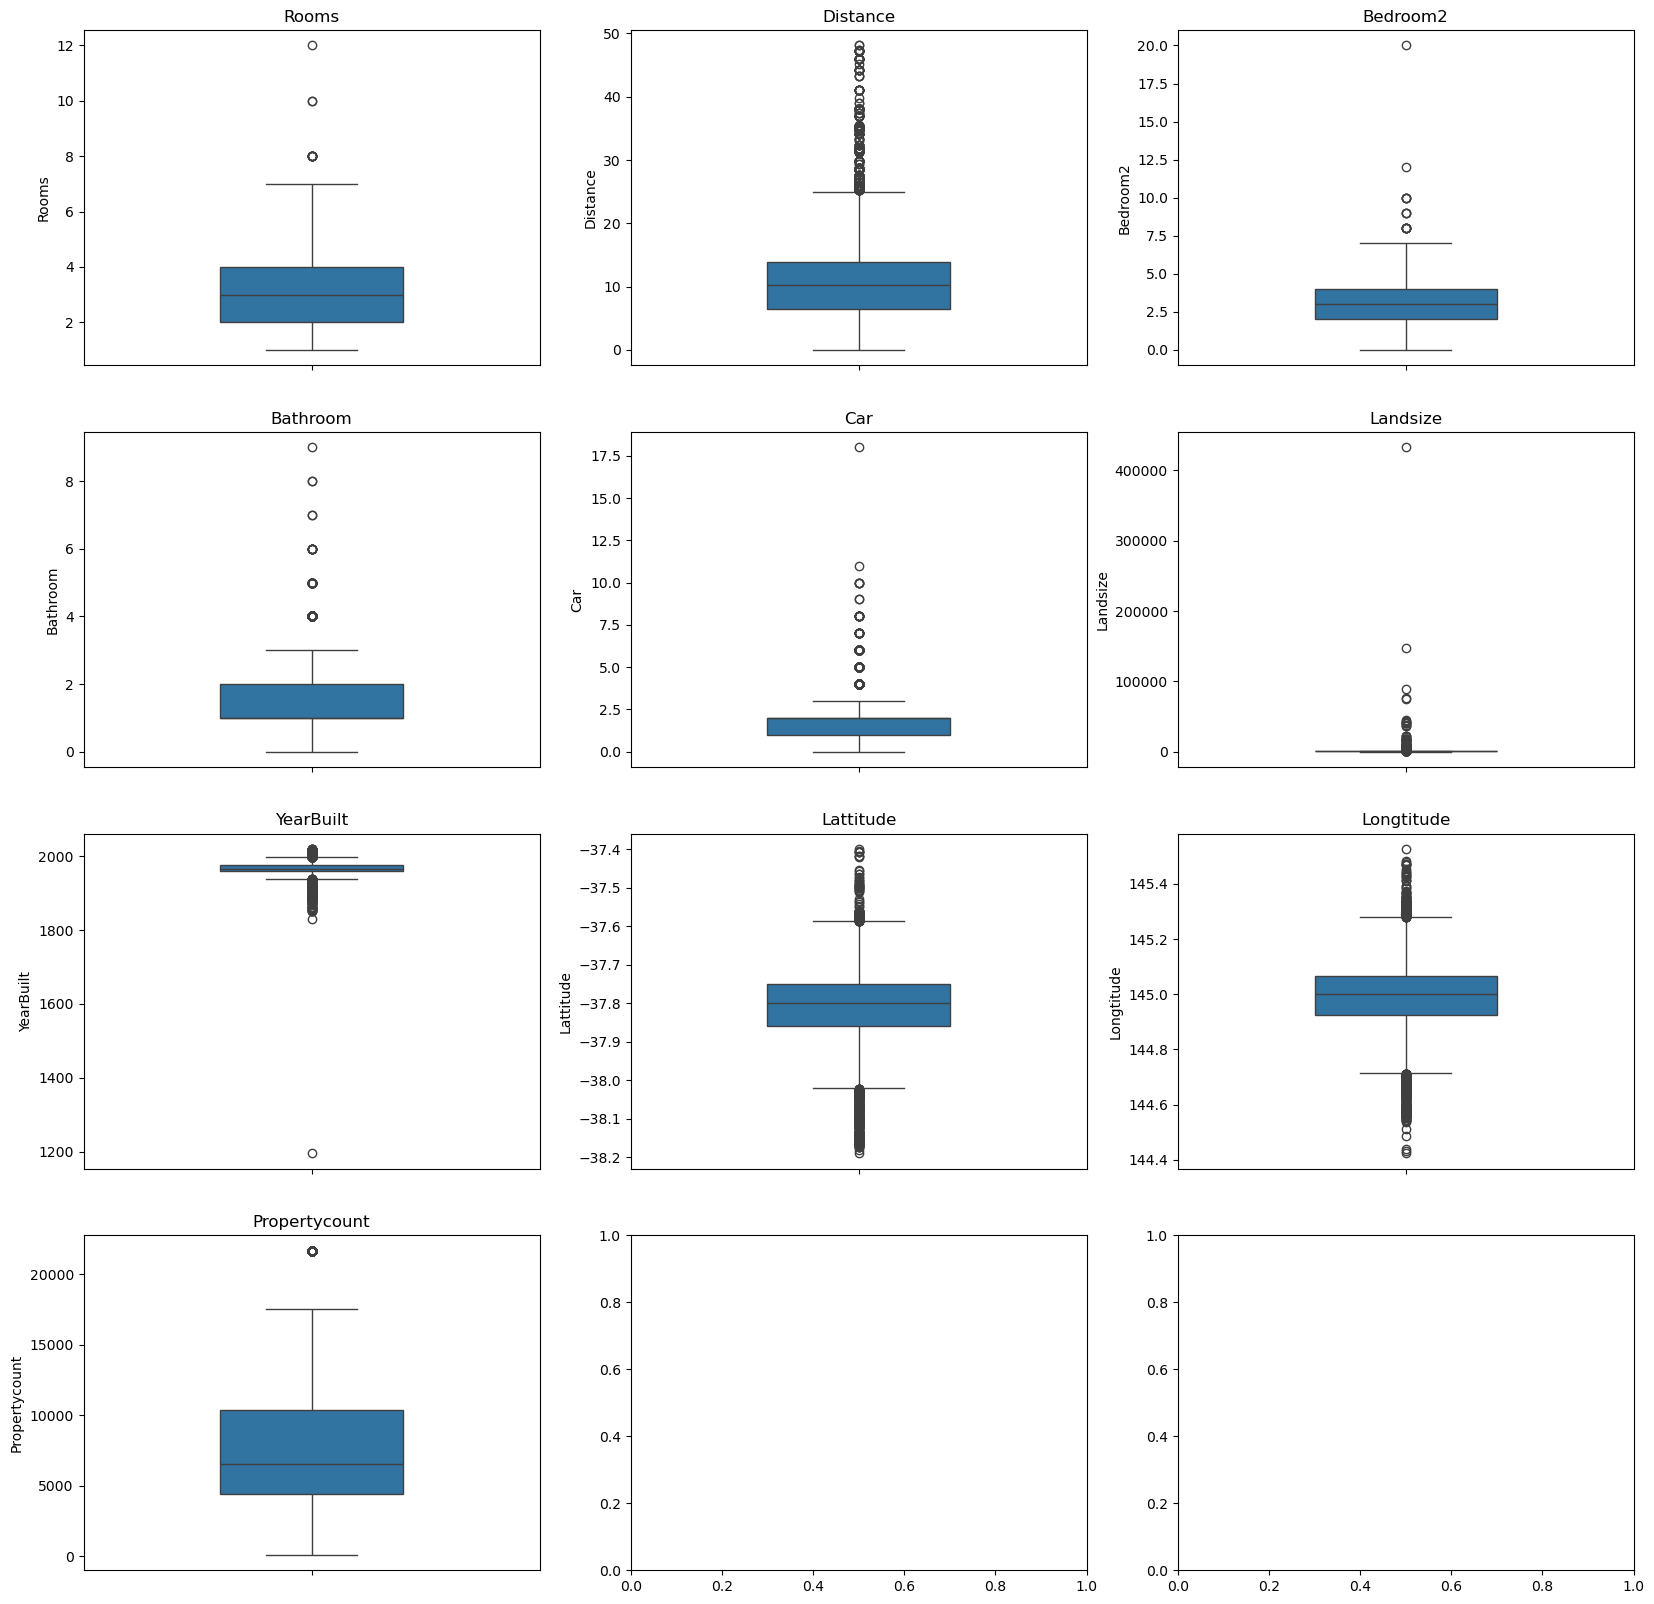

In [178]:
for ax, var_col in zip(plt.subplots(4, 3, figsize = (20,20), sharex = False, sharey = False)[1].flatten(), numerical_cols):
    ax.set_title(var_col)
    sns.boxplot(X[var_col], ax = ax, width = 0.4)

In [179]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Обучение KNN и кроссвалидация

In [180]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(5)

In [230]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm

cv = KFold(n_splits=5)
errors = []

for train_idx, val_idx in cv.split(X):
    X_train, y_train = X[train_idx], np.array(y)[train_idx]
    X_val, y_val = X[val_idx], np.array(y)[val_idx]

    knn.fit(X_train, y_train)
    pred_val = knn.predict(X_val)
    errors.append(mean_squared_error(y_val, pred_val))

print()
print('Metrix:')
print(errors)
print(f'RMSE = {np.mean(errors) ** 0.5}')



Metrix:
[159327550865.46643, 141544479199.22556, 121210356353.12999, 142044888994.95667, 140539068431.3749]
RMSE = 375410.8000162365


In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, shuffle=True)

In [221]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [219]:
model_predict = model.predict(X_test)

In [231]:
mean_absolute_error(y_test, model_predict)

184892.47843137255

## Cross_val_score

In [233]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv = 5)
scores

array([0.65639545, 0.64274961, 0.68027609, 0.66469131, 0.69385237])

<div class = 'alert alert-block alert-warning'>
    
```    cross_val_score выдает стандартный скор для всех регрессоров -- R_squared.```
</div>

### Передадим свой собтсвенный скорер

In [234]:
from sklearn.metrics import make_scorer
scorer = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred), greater_is_better=False)
errors = cross_val_score(knn, X, y, cv = 5, scoring=scorer)
errors

array([-1.59327551e+11, -1.41544479e+11, -1.21210356e+11, -1.42044889e+11,
       -1.40539068e+11])

In [235]:
f'RMSE = {np.mean(-errors) ** 0.5}'

'RMSE = 375410.8000162365'

## Final fitting

In [236]:
knn.fit(X, y)

KNeighborsRegressor()